In [27]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import torch

from dataset import ImageTransformBuilder

In [10]:
VGG16_SIZE = (256, 256)
VGG16_MEAN = (0.485, 0.456, 0.406)
VGG16_STD = (0.229, 0.224, 0.225)

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(DEVICE)

checkpoint_path = './results/checkpoints'
epoch = 10

save_path = os.path.join(checkpoint_path, f"{epoch}.pth")

cuda:0


In [11]:
ant_bee_classifier = torch.load(save_path, map_location=DEVICE)

In [37]:
transform_builder = ImageTransformBuilder(VGG16_SIZE, VGG16_MEAN, VGG16_STD)
image_transform = transform_builder('val')

ant_sample_orig = Image.open('./data/hymenoptera_data/sample/ant.jpeg')
bee_sample_orig = Image.open('./data/hymenoptera_data/sample/bee.jpeg')

ant_sample = image_transform(ant_sample_orig).unsqueeze_(0)
bee_sample = image_transform(bee_sample_orig).unsqueeze_(0)

ant_sample = ant_sample.to(DEVICE)
ant_sample_pred = ant_bee_classifier(ant_sample).item()

bee_sample = bee_sample.to(DEVICE)
bee_sample_pred = ant_bee_classifier(bee_sample).item()

Text(0.5, 1.0, 'bee')

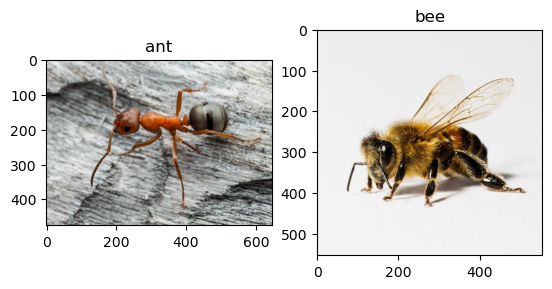

In [38]:
plt.subplot(1,2,1)
plt.imshow(ant_sample_orig)
plt.title('ant' if ant_sample_pred < 0 else 'bee')

plt.subplot(1,2,2)
plt.imshow(bee_sample_orig)
plt.title('ant' if bee_sample_pred < 0 else 'bee')